In [21]:

import time
import os
import shutil
import pandas as pd
from datetime import datetime
from dateutil import tz
import warnings
import itertools

import math
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split



In [2]:
# Remove the NaN rows and columns

def removeNaN(curr_feat_1, curr_feat_2):
    curr_feat_1_nan = np.array([])  # numpy.float64
    curr_feat_2_nan = np.array([])  # numpy.float64
    posi = 0
    # *** Check for and remove the Nan rows in from ONLY [curr_feat_2] feature rows
    for posi in range(len(curr_feat_2)):
        if not (math.isnan(curr_feat_2[posi])):# and not(math.isnan(curr_feat_1[posi]))):
            curr_feat_1_nan = np.append(curr_feat_1_nan, curr_feat_1[posi])
            curr_feat_2_nan = np.append(curr_feat_2_nan, curr_feat_2[posi])
            if (posi < 10):
                print(curr_feat_2_nan[posi])
        if (math.isnan(curr_feat_1[posi])):
            # curr_feat_1_nan = np.append(curr_feat_1_nan, curr_feat_1[posi])
            # curr_feat_2_nan = np.append(curr_feat_2_nan, curr_feat_2[posi])
            if (posi < 10):
                print(curr_feat_2_nan[posi])
    return curr_feat_1_nan, curr_feat_2_nan

#### Import .csv dataset into pandas
print('Importing Data Now')

#filename = '/Users/Mandala/PycharmProjects/ML_Project/windowing_results.csv'
filename = 'actrec_windowing_1&2&5&6.csv'

# Read data from csv file 
df_feat = pd.read_csv(filename)
df_keys = df_feat.keys()



Importing Data Now


In [3]:
df_feat

,Unnamed: 0,ECG #,start_time,end_time,acc_mean,acc_std,acc_50%,acc_eng,acc_var,acc_skew,acc_kurt,gyro_mean,gyro_std,gyro_50%,gyro_eng,gyro_var,gyro_skew,gyro_kurt,Activity
0,svm,1,2019-11-21 09:35:27,2019-11-21 09:35:29,1.488039,0.008815,1.487741,5028.758152,0.000078,0.084834,-0.531150,0.934210,0.451446,0.892834,2444.644866,0.203803,0.492299,0.014721,"(0,0)"
1,svm,1,2019-11-21 09:35:28,2019-11-21 09:35:30,1.487708,0.008177,1.487741,5061.915525,0.000067,-0.074702,-0.411535,0.869209,0.456088,0.779196,2203.410455,0.208016,0.772472,0.362000,"(0,0)"
2,svm,1,2019-11-21 09:35:29,2019-11-21 09:35:31,1.484074,0.007623,1.482889,5039.399575,0.000058,0.406782,-0.166754,0.824283,0.497646,0.697942,2120.945536,0.247652,1.072809,0.951265,"(0,0)"
3,svm,1,2019-11-21 09:35:30,2019-11-21 09:35:32,1.487552,0.007213,1.488377,5076.308247,0.000052,-0.003496,-0.236324,0.843949,0.560521,0.673428,2354.323033,0.314183,1.283556,1.183364,"(0,0)"
4,svm,1,2019-11-21 09:35:31,2019-11-21 09:35:33,1.486918,0.006790,1.488377,5047.650638,0.000046,-0.031493,-0.088531,1.035346,0.672304,0.849516,3478.688197,0.451992,1.079871,0.786448,"(0,0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10286,svm,6,2019-11-21 11:00:35,2019-11-21 11:00:37,1.601729,0.088580,1.566651,5370.640005,0.007846,0.901604,-0.614297,3.035541,1.779093,2.628791,25833.234557,3.165173,1.786256,4.765928,"(2,3)"
10287,svm,6,2019-11-21 11:00:36,2019-11-21 11:00:38,1.584692,0.055840,1.579270,5725.213374,0.003118,0.364050,-1.093746,3.232552,1.729938,2.962076,30604.610546,2.992684,1.558248,4.272371,"(2,3)"
10288,svm,6,2019-11-21 11:00:37,2019-11-21 11:00:39,1.634041,0.070983,1.651781,6096.616139,0.005039,-0.378410,-1.316773,3.443357,1.621118,3.164181,33008.076912,2.628023,1.724908,5.127654,"(2,3)"
10289,svm,6,2019-11-21 11:00:38,2019-11-21 11:00:40,1.701175,0.045277,1.706349,6591.398275,0.002050,-0.495898,-0.477644,3.277129,1.543004,3.049675,29859.735732,2.380862,1.807932,6.491142,"(2,3)"


In [4]:
print(df_keys)
len(df_keys)

Index(['Unnamed: 0', 'ECG #', 'start_time', 'end_time', 'acc_mean', 'acc_std',
       'acc_50%', 'acc_eng', 'acc_var', 'acc_skew', 'acc_kurt', 'gyro_mean',
       'gyro_std', 'gyro_50%', 'gyro_eng', 'gyro_var', 'gyro_skew',
       'gyro_kurt', 'Activity'],
      dtype='object')


19

In [5]:
# Data Preprocessing
df = df_feat.copy()
df = df.dropna()

Xs = df[df_keys[4:18]]
y = df['Activity']

print(Xs)
print(y)

       acc_mean   acc_std   acc_50%      acc_eng   acc_var  acc_skew  \
0      1.488039  0.008815  1.487741  5028.758152  0.000078  0.084834   
1      1.487708  0.008177  1.487741  5061.915525  0.000067 -0.074702   
2      1.484074  0.007623  1.482889  5039.399575  0.000058  0.406782   
3      1.487552  0.007213  1.488377  5076.308247  0.000052 -0.003496   
4      1.486918  0.006790  1.488377  5047.650638  0.000046 -0.031493   
...         ...       ...       ...          ...       ...       ...   
10286  1.601729  0.088580  1.566651  5370.640005  0.007846  0.901604   
10287  1.584692  0.055840  1.579270  5725.213374  0.003118  0.364050   
10288  1.634041  0.070983  1.651781  6096.616139  0.005039 -0.378410   
10289  1.701175  0.045277  1.706349  6591.398275  0.002050 -0.495898   
10290  1.727280  0.024522  1.721291  4529.858341  0.000601  0.370031   

       acc_kurt  gyro_mean  gyro_std  gyro_50%      gyro_eng  gyro_var  \
0     -0.531150   0.934210  0.451446  0.892834   2444.644866 

In [6]:
# This is the data split

X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2, random_state=10)

# Training the model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [7]:
y_pred = classifier.predict(X_test)
print(y_pred)

['(0,0)' '(2,2)' '(0,2)' ... '(2,2)' '(1,1)' '(0,1)']


In [8]:
len(y_pred)

2059

In [9]:
len(y_test)

2059

In [10]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

[[ 35   0   2   0   0   9   4   1   0   0   2   1]
 [  7 109   8  15   0  12  20  18   3   4  17   5]
 [  2  13 137  11   0   9  18  12   0   6   6   9]
 [  4  25  20  73   1   8  15  14   1   4  11   2]
 [  3   0   2   3  19   2   5   3   0   3   3   1]
 [  5  15  26   5   0  70  26   8   0  10  17   9]
 [  0  32  26   9   1  30 163  19   1   6  16   5]
 [  4  26  16   4   1  16  24  72   3   4  10   7]
 [  4   4   0   3   1   1  13   3   7   0   5   3]
 [  3   5  23   9   3  12  20   6   0  43  27   3]
 [  3  30   9  14   1   5  44  21   1  11 137   9]
 [  3  14  21  11   0  15  24   5   2   7   5  66]]
              precision    recall  f1-score   support

       (0,0)       0.48      0.65      0.55        54
       (0,1)       0.40      0.50      0.44       218
       (0,2)       0.47      0.61      0.53       223
       (0,3)       0.46      0.41      0.44       178
       (1,0)       0.70      0.43      0.54        44
       (1,1)       0.37      0.37      0.37       191
       (

In [11]:
accuracy = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy.append(accuracy_score(y_test,y_pred))

Text(0, 0.5, 'Accuracy')

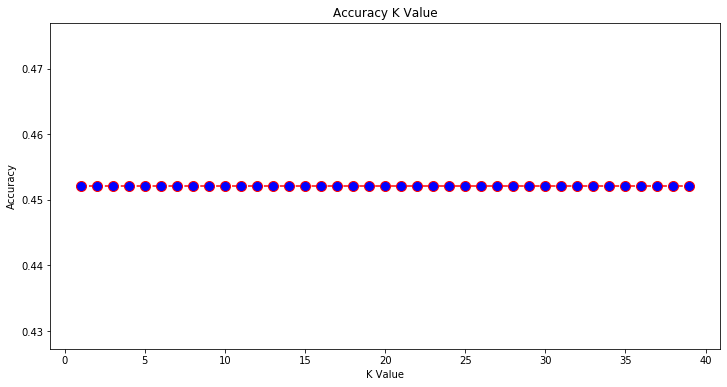

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), accuracy, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [14]:
df_video = df.loc[(df.Activity == "(0,0)") | (df.Activity == "(0,1)") | (df.Activity == "(0,2)") | (df.Activity == "(0,3)")]

In [15]:
df_noeval = df.loc[(df.Activity == "(1,0)") | (df.Activity == "(1,1)") | (df.Activity == "(1,2)") | (df.Activity == "(1,3)")]

In [16]:
df_eval = df.loc[(df.Activity == "(2,0)") | (df.Activity == "(2,1)") | (df.Activity == "(2,2)") | (df.Activity == "(2,3)")]

In [17]:
def kNN(x):
    y = x.copy()
    df = y.dropna()

    Xs = df[df_keys[4:18]]
    y = df['Activity']
    
    X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2, random_state=10)

    from sklearn.neighbors import KNeighborsClassifier
    classifier = KNeighborsClassifier(n_neighbors=7)
    classifier.fit(X_train, y_train)
    
    y_pred = classifier.predict(X_test)
    
    from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(accuracy_score(y_test,y_pred))

In [18]:
kNN(df_video)

[[ 47   9   9   4]
 [ 13 144  27  23]
 [  6  26 161  27]
 [  6  42  33 104]]
              precision    recall  f1-score   support

       (0,0)       0.65      0.68      0.67        69
       (0,1)       0.65      0.70      0.67       207
       (0,2)       0.70      0.73      0.72       220
       (0,3)       0.66      0.56      0.61       185

    accuracy                           0.67       681
   macro avg       0.67      0.67      0.67       681
weighted avg       0.67      0.67      0.67       681

0.6696035242290749


In [19]:
kNN(df_noeval)

[[ 21   4  14   4]
 [  0 138  41  23]
 [  1  31 238  23]
 [  5  26  55 111]]
              precision    recall  f1-score   support

       (1,0)       0.78      0.49      0.60        43
       (1,1)       0.69      0.68      0.69       202
       (1,2)       0.68      0.81      0.74       293
       (1,3)       0.69      0.56      0.62       197

    accuracy                           0.69       735
   macro avg       0.71      0.64      0.66       735
weighted avg       0.69      0.69      0.69       735

0.691156462585034


In [20]:
kNN(df_eval)

[[ 18   0  14   3]
 [  1  95  56  17]
 [  4  24 228  23]
 [  1  11  50  99]]
              precision    recall  f1-score   support

       (2,0)       0.75      0.51      0.61        35
       (2,1)       0.73      0.56      0.64       169
       (2,2)       0.66      0.82      0.73       279
       (2,3)       0.70      0.61      0.65       161

    accuracy                           0.68       644
   macro avg       0.71      0.63      0.66       644
weighted avg       0.69      0.68      0.68       644

0.6832298136645962
